['SI' 'SP' 'NI' 'WP' 'EP' nan 'SA']
['MM' 'WA' 'EA' 'BB' 'CP' 'GM' nan 'CS' 'AS']
['TS' 'NR' 'ET' 'MX' 'SS' 'DS']
ISO_TIME
2015-10-23 12:00:00    185.0
2015-10-23 06:00:00    180.0
2015-10-23 18:00:00    180.0
2005-10-19 12:00:00    160.0
2019-09-01 16:40:00    160.0
2019-09-01 18:00:00    160.0
2005-09-22 03:00:00    155.0
2005-09-22 06:00:00    155.0
2009-10-18 06:00:00    155.0
2009-10-18 12:00:00    155.0
Name: WIND, dtype: float64
SID
2015293N13266    185.0
2005289N18282    160.0
2019236N10314    160.0
2005261N21290    155.0
2009288N07267    155.0
2017242N16333    155.0
2005236N23285    150.0
2007225N12331    150.0
2007244N12303    150.0
2016041S14170    150.0
Name: WIND, dtype: float64


<Axes: xlabel='ISO_TIME'>

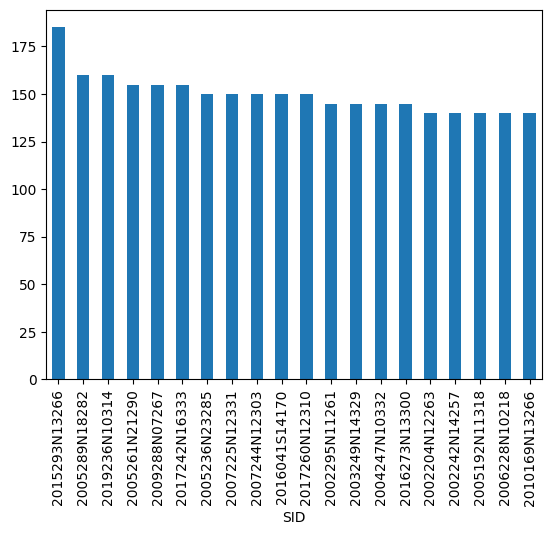

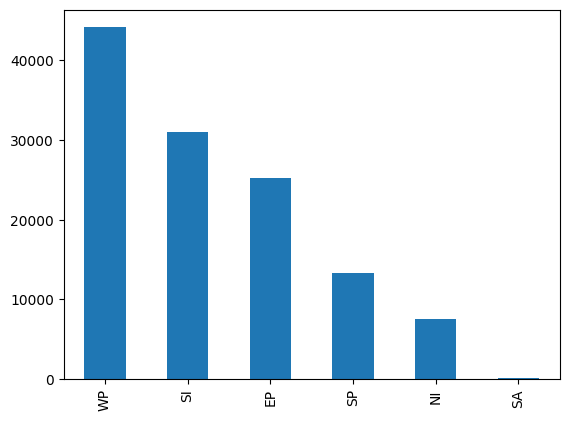

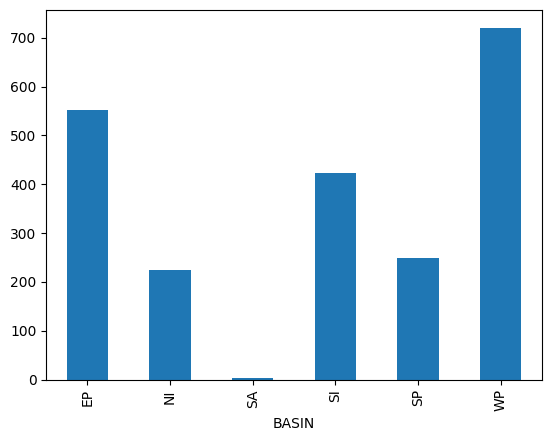

<Figure size 640x480 with 0 Axes>

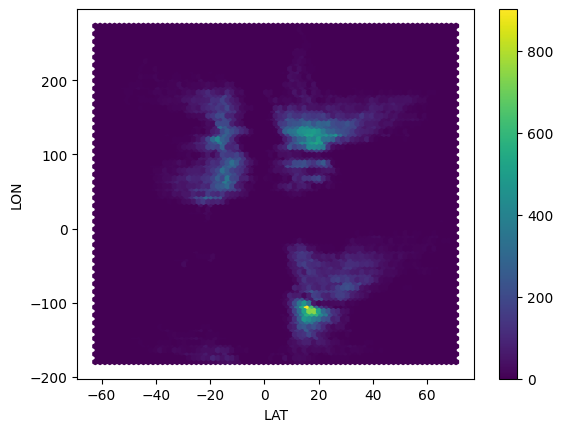

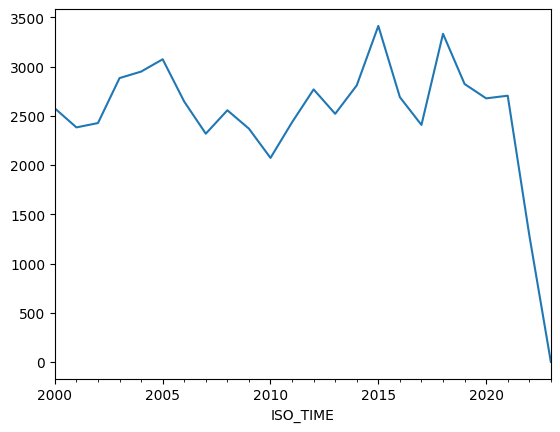

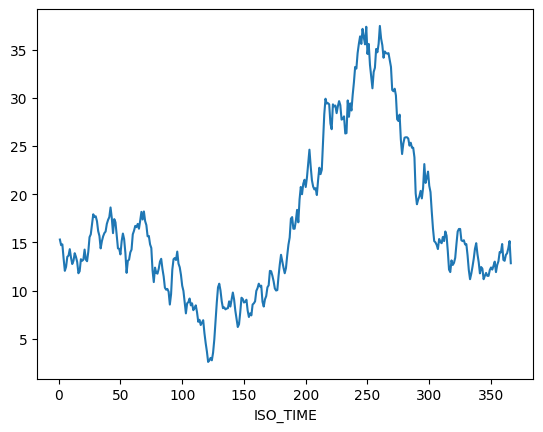

In [2]:
## MM Comment: Need to label the y-axis, cbar, and add titles to figures (-0.25)
from datetime import timedelta

import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

data = pd.read_csv('/Users/mmamer3/Downloads/hurricane_data_after2000.csv', sep=',', na_values=[-9999.0, -99.0, 'nan'])

data['ISO_TIME'] = pd.to_datetime(data['ISO_TIME'])

data = data.set_index('ISO_TIME')

basin = data.BASIN.unique()
subbasin = data.SUBBASIN.unique()
nature = data.NATURE.unique()
print(basin)
print(subbasin)
print(nature)

data = data.rename(columns={"WMO_WIND": "WIND", "WMO_PRES": "PRES"})

fast_wind = data['WIND'].nlargest(10)
print(fast_wind)


hurr_wind = data.groupby("SID", group_keys=True)[['WIND']].max()
print(hurr_wind['WIND'].nlargest(10))

fig1 = plt.figure()
hurr_wind['WIND'].nlargest(20).plot(kind='bar')

count = data['BASIN'].value_counts()
fig2 = plt.figure()
count.plot(kind='bar')

hurrcount = data.groupby('BASIN')['SID'].nunique()
fig6 = plt.figure()
hurrcount.plot(kind='bar')

fig3 = plt.figure()
data.plot.hexbin(x='LAT', y='LON', gridsize=75, cmap='viridis')


fig4 = plt.figure()
dat_yy = data.resample('Y').count()
dat_yy['WIND'].plot()

fig5 = plt.figure()
dat_yy = data.resample('D').count()
dat_doy = dat_yy.groupby(dat_yy.index.dayofyear).mean()
dat_doy['NUMBER'].plot()